In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df=pd.read_csv('bigData_V5.csv',sep=';',encoding='cp1252',decimal=',')

In [3]:
df.head()

,id,periodid,startdate,enddate,isGk,isShared,isUsn,isEnvd,isBudget,employeerQNew,...,mainSystem1420,mainSystem1421,mainSystem1422,mainSystem1423,mainSystem1424,mainSystem1425,mainSystem1426,mainSystem1427,mainSystem1428,notMainSystem
0,3,20861,01.04.2017 0:00,30.04.2017 0:00,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
1,3,20862,01.05.2017 0:00,31.05.2017 0:00,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
2,3,20864,01.06.2017 0:00,30.06.2017 0:00,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
3,3,20865,01.07.2017 0:00,31.07.2017 0:00,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
4,3,20866,01.08.2017 0:00,31.08.2017 0:00,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df['enddate'] = pd.to_datetime(df.enddate, format='%d.%m.%Y %H:%M')
df['startdate']= pd.to_datetime(df.startdate, format='%d.%m.%Y %H:%M')
df['paid_time']= (pd.to_datetime(df.paidDate, format='%d.%m.%Y %H:%M')-df.startdate).dt.days
Nov=pd.Timestamp('2019-11-01 00:00:00')
Dec=pd.Timestamp('2019-12-01 00:00:00')
Jan=pd.Timestamp('2020-01-01 00:00:00')
Feb=pd.Timestamp('2020-02-01 00:00:00')
df=df[df.startdate<Dec]
df['last_month']=df.groupby(['id'])['startdate'].transform(max)
df['prev_last_month']=df.last_month-pd.DateOffset(months=1)

In [5]:
df.tail()

,id,periodid,startdate,enddate,isGk,isShared,isUsn,isEnvd,isBudget,employeerQNew,...,mainSystem1423,mainSystem1424,mainSystem1425,mainSystem1426,mainSystem1427,mainSystem1428,notMainSystem,paid_time,last_month,prev_last_month
107707,1696317,21709,2019-11-01,2019-11-30,0,0,0,0,0,NaN,...,0,0,0,0,0,0,1,NaN,2019-11-01,2019-10-01
107711,1696323,21708,2019-10-01,2019-10-31,0,1,0,0,0,15.0,...,0,0,0,0,0,0,1,3.0,2019-11-01,2019-10-01
107712,1696323,21709,2019-11-01,2019-11-30,0,1,0,0,0,15.0,...,0,0,0,0,0,0,1,10.0,2019-11-01,2019-10-01
107716,1696385,21709,2019-11-01,2019-11-30,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,34.0,2019-11-01,2019-10-01
107720,1696463,21709,2019-11-01,2019-11-30,0,0,0,0,0,NaN,...,0,0,0,0,0,0,1,-15.0,2019-11-01,2019-10-01


In [6]:
unique_id=df.id.unique()
len(unique_id)

4109

In [7]:
df['enddate'] = pd.to_datetime(df.enddate, format='%d.%m.%Y %H:%M')
df['startdate']= pd.to_datetime(df.startdate, format='%d.%m.%Y %H:%M')
df['paid_time']= (pd.to_datetime(df.paidDate, format='%d.%m.%Y %H:%M')-df.startdate).dt.days
df['last_month']=df.groupby(['id'])['startdate'].transform(max)
df['prev_last_month']=df.last_month-pd.DateOffset(months=1)
# df['prev2_last_month']=df.last_month-pd.DateOffset(months=2)
# df['prev3_last_month']=df.last_month-pd.DateOffset(months=2)

In [8]:
for id in unique_id:
    if df.loc[(df.id==id)&(df.startdate>=df.last_month-pd.Timedelta(days=95))].shape[0]<4:
        df=df[df.id!=id]

In [9]:
len(df.id.unique())

3753

In [10]:
client_data=df.groupby('id',as_index=False).agg({'startdate':'max'}).rename({'startdate':'last_month'},axis=1)

In [11]:
end_of_time=max(df.last_month)
end_of_time

Timestamp('2019-11-01 00:00:00')

In [12]:
client_data['is_gone']=(client_data.last_month!=end_of_time)

In [13]:
client_data.groupby('is_gone').count()

,id,last_month
is_gone,,
False,2744,2744
True,1009,1009


In [14]:
excepted_columns=['id','paidDate','startdate','enddate','last_month','prev_last_month','periodid']

In [15]:
df

,id,periodid,startdate,enddate,isGk,isShared,isUsn,isEnvd,isBudget,employeerQNew,...,mainSystem1423,mainSystem1424,mainSystem1425,mainSystem1426,mainSystem1427,mainSystem1428,notMainSystem,paid_time,last_month,prev_last_month
0,3,20861,2017-04-01,2017-04-30,0,0,0,0,0,NaN,...,0,0,0,0,0,0,1,NaN,2017-12-01,2017-11-01
1,3,20862,2017-05-01,2017-05-31,0,0,0,0,0,NaN,...,0,0,0,0,0,0,1,NaN,2017-12-01,2017-11-01
2,3,20864,2017-06-01,2017-06-30,0,0,0,0,0,NaN,...,0,0,0,0,0,0,1,NaN,2017-12-01,2017-11-01
3,3,20865,2017-07-01,2017-07-31,0,0,0,0,0,NaN,...,0,0,0,0,0,0,1,NaN,2017-12-01,2017-11-01
4,3,20866,2017-08-01,2017-08-31,0,0,0,0,0,NaN,...,0,0,0,0,0,0,1,NaN,2017-12-01,2017-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107656,1691304,21709,2019-11-01,2019-11-30,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,26.0,2019-11-01,2019-10-01
107660,1692840,21706,2019-08-01,2019-08-31,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0.0,2019-11-01,2019-10-01
107661,1692840,21707,2019-09-01,2019-09-30,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,-31.0,2019-11-01,2019-10-01
107662,1692840,21708,2019-10-01,2019-10-31,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,-61.0,2019-11-01,2019-10-01


In [16]:
eps=1e-9
# columns=list(set(list(df.columns))-set('id'))
for id in unique_id:
    print(id,end=' ')
    for col in df.columns:
        if col in excepted_columns:
            continue
       
        max_value=df.loc[(df.id==id)&(df.startdate>df.prev_last_month-pd.Timedelta(days=182))&(df.startdate<=df.prev_last_month)][col].astype(float).max()
        min_value=df.loc[(df.id==id)&(df.startdate>df.prev_last_month-pd.Timedelta(days=182))&(df.startdate<=df.prev_last_month)][col].astype(float).min()
        cur_value=df.loc[(df.id==id)&(df.startdate==df.prev_last_month)][col].astype(float).max()
                  

        client_data.loc[client_data.id==id,col+'max']=(cur_value+eps)/(max_value+eps)
        client_data.loc[client_data.id==id,col+'min']=(cur_value+eps)/(min_value+eps)
        client_data.loc[client_data.id==id,col+'cur']=cur_value
    
        

3 29 42 63 65 102 108 123 128 132 137 185 211 246 251 319 338 342 361 447 535 538 555 557 589 612 640 710 711 712 722 836 851 877 894 909 914 930 962 968 969 1064 1103 1150 1211 1276 1325 1337 1345 1355 1423 1458 1602 1643 1776 1820 1835 1890 1907 1935 2024 2032 2055 2064 2065 2067 2071 2073 2074 2075 2076 2077 2078 2090 2129 2130 2132 2143 2145 2152 2163 2244 2260 2302 2365 2368 2369 2391 2411 2416 2417 2455 2509 2532 2535 2547 2549 2596 2670 2742 2748 2787 2798 2805 2819 2820 2821 2840 2845 2871 2874 2884 2968 3012 3208 3210 3212 3242 3250 3309 3342 3385 3503 3679 3815 3872 3915 4021 4026 4043 4121 4149 4185 4191 4193 4194 4218 4303 4394 4412 4426 4486 4488 4515 4518 4536 4541 4543 4553 4570 4614 4714 4715 4718 4725 4730 4741 4752 4766 4778 4781 4798 4800 4801 4804 4807 4825 4827 4828 4829 4842 4855 4861 4862 4872 4883 4886 4891 4950 4982 5003 5012 5016 5035 5042 5094 5111 5129 5134 5193 5222 5230 5285 5293 5297 5299 5314 5327 5331 5336 5342 5357 5395 5414 5418 5428 5446 5453 5479 54

21783 21809 21812 21813 21821 21867 21900 21902 21936 21947 21948 21994 22035 22039 22069 22071 22126 22129 22132 22133 22135 22142 22146 22149 22152 22172 22179 22201 22222 22228 22236 22238 22250 22255 22294 22315 22334 22366 22388 22397 22454 22469 22480 22481 22482 22483 22493 22517 22544 22551 22565 22591 22601 22647 22654 22745 22778 22783 22822 22836 22871 22919 22925 22992 23105 23129 23130 23131 23174 23265 23329 23358 23363 23364 23369 23390 23445 23466 23505 23544 23599 23632 23633 23634 23637 23659 23718 23720 23758 23762 23766 23767 23772 23775 23778 23815 23817 23825 23864 23877 23888 23889 23897 23898 23911 23916 23923 23927 23937 23938 23945 23952 23962 23995 24093 24124 24136 24185 24186 24207 24228 24252 24284 24311 24327 24353 24391 24410 24411 24515 24553 24560 24600 24632 24658 24685 24694 24716 24720 24725 24727 24733 24734 24736 24765 24783 24784 24790 24796 24807 24823 24825 24826 24852 24853 24854 24855 24856 24876 24905 24925 24926 24935 24945 24955 24985 2500

553354 553363 553561 553565 553593 553798 553868 553869 553881 553884 554329 554508 614841 637904 637923 637935 637941 637944 637945 637948 637949 637954 637956 637957 637958 638161 640478 642712 642947 642983 662307 662431 662591 662600 662602 662712 662909 663093 680987 680996 715684 715685 742099 745368 746355 749418 750272 750363 750378 750387 750389 750559 750606 750617 750635 750878 750900 750912 750920 750933 816452 816461 816607 816656 816661 816725 816764 816775 816778 816916 820930 821042 821140 821292 842148 842153 842192 858566 858618 858906 858947 859097 866771 868464 880206 880211 880213 880349 880468 880487 880495 880502 880621 880624 880656 880700 880705 880706 880709 903002 924179 924229 924231 924765 924951 925010 925011 925014 925015 925016 925170 925171 925179 925296 925298 925301 925333 925846 925848 925955 926363 926604 926606 926881 926903 927289 927311 927387 927448 927531 927603 927633 927800 927803 927810 928284 928292 928297 930124 934802 937772 939358 939635

1638576 1638580 1639132 1639140 1639143 1639146 1639149 1639150 1639151 1639152 1639159 1639160 1640087 1640101 1640609 1641343 1641345 1641346 1641356 1641360 1641373 1641374 1641379 1641380 1642225 1642228 1642231 1642293 1642305 1642819 1642824 1642830 1643631 1643784 1643786 1643788 1643789 1643795 1644716 1644721 1650324 1653361 1653363 1654370 1654838 1654839 1654846 1654852 1654853 1655120 1655122 1655131 1656134 1656136 1656143 1656148 1656678 1656679 1656684 1656758 1656759 1658035 1658764 1659072 1659077 1659094 1659096 1659102 1660255 1660689 1661196 1661607 1661620 1662139 1662140 1662153 1662169 1662176 1662669 1662673 1662692 1662697 1663689 1663691 1663710 1663713 1663720 1664387 1664392 1664399 1664850 1664854 1664856 1664862 1664984 1664987 1665258 1665589 1665592 1665593 1665596 1665597 1665601 1665602 1665630 1666037 1666038 1666580 1666581 1666589 1666590 1666597 1666607 1666609 1666620 1667893 1667903 1667924 1667926 1667933 1667934 1668807 1668828 1668832 1668836 

In [17]:
client_data

,id,last_month,is_gone,isGkmax,isGkmin,isGkcur,isSharedmax,isSharedmin,isSharedcur,isUsnmax,...,mainSystem1427cur,mainSystem1428max,mainSystem1428min,mainSystem1428cur,notMainSystemmax,notMainSystemmin,notMainSystemcur,paid_timemax,paid_timemin,paid_timecur
0,3,2017-12-01,True,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN
1,29,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.000000e+00,1.115385,29.0
2,42,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.954545e-01,2.166667,13.0
3,63,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,6.086957e-01,7.000000,14.0
4,65,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,1689521,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN
3749,1689984,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,-7.714286e+00,1.000000,-54.0
3750,1690027,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3.043478e-01,1.166667,7.0
3751,1691304,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.000000e+00,1.034483,30.0


In [18]:
client_data1=client_data.fillna(0)

In [19]:
client_data1.head()

,id,last_month,is_gone,isGkmax,isGkmin,isGkcur,isSharedmax,isSharedmin,isSharedcur,isUsnmax,...,mainSystem1427cur,mainSystem1428max,mainSystem1428min,mainSystem1428cur,notMainSystemmax,notMainSystemmin,notMainSystemcur,paid_timemax,paid_timemin,paid_timecur
0,3,2017-12-01,True,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.0
1,29,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.000000,1.115385,29.0
2,42,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.295455,2.166667,13.0
3,63,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.608696,7.000000,14.0
4,65,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.0


In [20]:
client_data1.loc[client_data1.id==65].isHaveLawyercur

4    16954.0
Name: isHaveLawyercur, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
import random
import numpy as np
import torch
from torch.optim import Adam, lr_scheduler

random.seed(1234)
np.random.seed(1234)
torch.manual_seed(1234)
torch.cuda.manual_seed(1234)
torch.backends.cudnn.deterministic = True

In [22]:
X=client_data1.drop(['is_gone','last_month','id'],axis=1)
y=client_data1.is_gone

In [23]:
X.shape,y.shape

((3753, 255), (3753,))

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
X_train.shape

(3002, 255)

In [26]:
X_train=torch.DoubleTensor(X_train.values)
X_test=torch.DoubleTensor(X_test.values)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

In [27]:
X_train.shape

torch.Size([3002, 255])

In [28]:
batch_size=X_train.shape[0]
lr=1e-4
num_epoch=2000
step_size=100
gamma=0.9

In [33]:
class API_net(torch.nn.Module):
    def __init__(self):
        super(API_net,self).__init__()
        self.fc1=torch.nn.Linear(255,600)
        self.act1=torch.nn.ReLU()
        self.fc2=torch.nn.Linear(600,600)
        self.act2=torch.nn.Tanh()
        self.fc3=torch.nn.Linear(600,600)
        self.act3=torch.nn.Sigmoid()
        self.fc4=torch.nn.Linear(600,2)
    
    def forward(self,x):
        x=self.fc1(x)
        x=self.act1(x)
        x=self.fc2(x)
        x=self.act2(x)
        x=self.fc3(x)
        x=self.act3(x)
        x=self.fc4(x)
        return x

model=API_net().double()

In [34]:
model=API_net().double()
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
loss=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=lr,weight_decay=0.0005)
scheduler = lr_scheduler.StepLR(optimizer,
                                step_size=step_size,
                                gamma=gamma)
    
train_accuracy_history=[]
train_loss_history=[]
test_accuracy_history=[]
test_loss_history=[]
    
for epoch in range(num_epoch):
    print()
    print('Epoch {}/{}:'.format(epoch, num_epoch - 1), flush=True)
        
    for phase in ['train','test']:
        if phase=='train':
            running_loss = 0
            running_acc = 0
            order=np.random.permutation(len(X_train))
            for start_index in range(0,len(X_train),batch_size):
                optimizer.zero_grad()
                model.train()
                batch_indexes=order[start_index:start_index+batch_size]
                X_batch=X_train[batch_indexes].to(device)
                y_batch=y_train[batch_indexes].to(device)
                preds=model.forward(X_batch)
                loss_value=loss(preds,y_batch)
                preds_class=preds.argmax(dim=1)
                loss_value.backward()
                optimizer.step()
                running_loss+=loss_value.data.cpu()
                running_acc+=(preds_class==y_batch).float().mean().data.cpu()
            train_accuracy_history.append(running_acc/(len(X_train)/batch_size))
            train_loss_history.append(running_loss/(len(X_train)/batch_size))
        else:
#             continue
            model.eval()
            preds=model.forward(X_test)
            loss_value=loss(preds,y_test).data
            preds_class=preds.argmax(dim=1)
            test_accuracy_history.append((preds_class==y_test).float().mean().data)
            test_loss_history.append(loss_value)
    print('train loss ',train_loss_history[-1])
    print('train acc  ',train_accuracy_history[-1])
    print('test loss  ',test_loss_history[-1])
    print('test acc   ',test_accuracy_history[-1])


Epoch 0/1999:
train loss  tensor(0.6387, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.6040, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 1/1999:
train loss  tensor(0.6018, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5803, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 2/1999:
train loss  tensor(0.5772, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5680, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 3/1999:
train loss  tensor(0.5638, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5598, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 4/1999:
train loss  tensor(0.5562, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5550, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 5/1999:
train loss  tensor(0.5521, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5516, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 6/1

train loss  tensor(0.4695, dtype=torch.float64)
train acc   tensor(0.7895)
test loss   tensor(0.4669, dtype=torch.float64)
test acc    tensor(0.7870)

Epoch 51/1999:
train loss  tensor(0.4688, dtype=torch.float64)
train acc   tensor(0.7898)
test loss   tensor(0.4669, dtype=torch.float64)
test acc    tensor(0.7883)

Epoch 52/1999:
train loss  tensor(0.4687, dtype=torch.float64)
train acc   tensor(0.7891)
test loss   tensor(0.4668, dtype=torch.float64)
test acc    tensor(0.7923)

Epoch 53/1999:
train loss  tensor(0.4697, dtype=torch.float64)
train acc   tensor(0.7888)
test loss   tensor(0.4669, dtype=torch.float64)
test acc    tensor(0.7909)

Epoch 54/1999:
train loss  tensor(0.4698, dtype=torch.float64)
train acc   tensor(0.7888)
test loss   tensor(0.4674, dtype=torch.float64)
test acc    tensor(0.7883)

Epoch 55/1999:
train loss  tensor(0.4694, dtype=torch.float64)
train acc   tensor(0.7878)
test loss   tensor(0.4679, dtype=torch.float64)
test acc    tensor(0.7870)

Epoch 56/1999:
trai

train loss  tensor(0.4905, dtype=torch.float64)
train acc   tensor(0.7761)
test loss   tensor(0.4890, dtype=torch.float64)
test acc    tensor(0.7856)

Epoch 101/1999:
train loss  tensor(0.4923, dtype=torch.float64)
train acc   tensor(0.7758)
test loss   tensor(0.4902, dtype=torch.float64)
test acc    tensor(0.7723)

Epoch 102/1999:
train loss  tensor(0.4944, dtype=torch.float64)
train acc   tensor(0.7712)
test loss   tensor(0.4910, dtype=torch.float64)
test acc    tensor(0.7696)

Epoch 103/1999:
train loss  tensor(0.4958, dtype=torch.float64)
train acc   tensor(0.7685)
test loss   tensor(0.4935, dtype=torch.float64)
test acc    tensor(0.7630)

Epoch 104/1999:
train loss  tensor(0.4990, dtype=torch.float64)
train acc   tensor(0.7652)
test loss   tensor(0.4955, dtype=torch.float64)
test acc    tensor(0.7523)

Epoch 105/1999:
train loss  tensor(0.5018, dtype=torch.float64)
train acc   tensor(0.7545)
test loss   tensor(0.4977, dtype=torch.float64)
test acc    tensor(0.7497)

Epoch 106/1999

train loss  tensor(0.5569, dtype=torch.float64)
train acc   tensor(0.7305)
test loss   tensor(0.5528, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 151/1999:
train loss  tensor(0.5571, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5521, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 152/1999:
train loss  tensor(0.5559, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5518, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 153/1999:
train loss  tensor(0.5562, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5511, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 154/1999:
train loss  tensor(0.5556, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5484, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 155/1999:
train loss  tensor(0.5525, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5454, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 156/1999

train loss  tensor(0.5386, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5435, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 201/1999:
train loss  tensor(0.5397, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5433, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 202/1999:
train loss  tensor(0.5395, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5440, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 203/1999:
train loss  tensor(0.5405, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5461, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 204/1999:
train loss  tensor(0.5431, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5508, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 205/1999:
train loss  tensor(0.5465, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5533, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 206/1999

train loss  tensor(0.5493, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5537, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 251/1999:
train loss  tensor(0.5501, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5586, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 252/1999:
train loss  tensor(0.5543, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5580, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 253/1999:
train loss  tensor(0.5539, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5640, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 254/1999:
train loss  tensor(0.5588, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5678, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 255/1999:
train loss  tensor(0.5621, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5668, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 256/1999

train loss  tensor(0.5477, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5469, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 301/1999:
train loss  tensor(0.5447, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5461, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 302/1999:
train loss  tensor(0.5447, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5465, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 303/1999:
train loss  tensor(0.5446, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5446, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 304/1999:
train loss  tensor(0.5422, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5426, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 305/1999:
train loss  tensor(0.5405, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5416, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 306/1999

train loss  tensor(0.5462, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5483, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 351/1999:
train loss  tensor(0.5458, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5490, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 352/1999:
train loss  tensor(0.5471, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5471, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 353/1999:
train loss  tensor(0.5454, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5447, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 354/1999:
train loss  tensor(0.5442, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5435, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 355/1999:
train loss  tensor(0.5435, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5426, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 356/1999

train loss  tensor(0.5220, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5239, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 401/1999:
train loss  tensor(0.5218, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5244, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 402/1999:
train loss  tensor(0.5224, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5245, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 403/1999:
train loss  tensor(0.5227, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5230, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 404/1999:
train loss  tensor(0.5228, dtype=torch.float64)
train acc   tensor(0.7312)
test loss   tensor(0.5245, dtype=torch.float64)
test acc    tensor(0.7310)

Epoch 405/1999:
train loss  tensor(0.5239, dtype=torch.float64)
train acc   tensor(0.7315)
test loss   tensor(0.5243, dtype=torch.float64)
test acc    tensor(0.7377)

Epoch 406/1999

train loss  tensor(0.5275, dtype=torch.float64)
train acc   tensor(0.7402)
test loss   tensor(0.5292, dtype=torch.float64)
test acc    tensor(0.7364)

Epoch 451/1999:
train loss  tensor(0.5266, dtype=torch.float64)
train acc   tensor(0.7408)
test loss   tensor(0.5280, dtype=torch.float64)
test acc    tensor(0.7364)

Epoch 452/1999:
train loss  tensor(0.5263, dtype=torch.float64)
train acc   tensor(0.7405)
test loss   tensor(0.5252, dtype=torch.float64)
test acc    tensor(0.7377)

Epoch 453/1999:
train loss  tensor(0.5245, dtype=torch.float64)
train acc   tensor(0.7412)
test loss   tensor(0.5253, dtype=torch.float64)
test acc    tensor(0.7417)

Epoch 454/1999:
train loss  tensor(0.5244, dtype=torch.float64)
train acc   tensor(0.7432)
test loss   tensor(0.5257, dtype=torch.float64)
test acc    tensor(0.7417)

Epoch 455/1999:
train loss  tensor(0.5253, dtype=torch.float64)
train acc   tensor(0.7425)
test loss   tensor(0.5233, dtype=torch.float64)
test acc    tensor(0.7417)

Epoch 456/1999

train loss  tensor(0.4813, dtype=torch.float64)
train acc   tensor(0.7905)
test loss   tensor(0.4793, dtype=torch.float64)
test acc    tensor(0.7989)

Epoch 501/1999:
train loss  tensor(0.4801, dtype=torch.float64)
train acc   tensor(0.7941)
test loss   tensor(0.4787, dtype=torch.float64)
test acc    tensor(0.7989)

Epoch 502/1999:
train loss  tensor(0.4796, dtype=torch.float64)
train acc   tensor(0.7945)
test loss   tensor(0.4776, dtype=torch.float64)
test acc    tensor(0.7949)

Epoch 503/1999:
train loss  tensor(0.4801, dtype=torch.float64)
train acc   tensor(0.7935)
test loss   tensor(0.4772, dtype=torch.float64)
test acc    tensor(0.8003)

Epoch 504/1999:
train loss  tensor(0.4794, dtype=torch.float64)
train acc   tensor(0.7951)
test loss   tensor(0.4768, dtype=torch.float64)
test acc    tensor(0.8003)

Epoch 505/1999:
train loss  tensor(0.4793, dtype=torch.float64)
train acc   tensor(0.7935)
test loss   tensor(0.4783, dtype=torch.float64)
test acc    tensor(0.7936)

Epoch 506/1999

train loss  tensor(0.4853, dtype=torch.float64)
train acc   tensor(0.7955)
test loss   tensor(0.4794, dtype=torch.float64)
test acc    tensor(0.8016)

Epoch 551/1999:
train loss  tensor(0.4822, dtype=torch.float64)
train acc   tensor(0.7921)
test loss   tensor(0.4776, dtype=torch.float64)
test acc    tensor(0.7989)

Epoch 552/1999:
train loss  tensor(0.4812, dtype=torch.float64)
train acc   tensor(0.7908)
test loss   tensor(0.4760, dtype=torch.float64)
test acc    tensor(0.7989)

Epoch 553/1999:
train loss  tensor(0.4802, dtype=torch.float64)
train acc   tensor(0.7951)
test loss   tensor(0.4727, dtype=torch.float64)
test acc    tensor(0.8029)

Epoch 554/1999:
train loss  tensor(0.4774, dtype=torch.float64)
train acc   tensor(0.7975)
test loss   tensor(0.4720, dtype=torch.float64)
test acc    tensor(0.8096)

Epoch 555/1999:
train loss  tensor(0.4768, dtype=torch.float64)
train acc   tensor(0.7978)
test loss   tensor(0.4718, dtype=torch.float64)
test acc    tensor(0.8056)

Epoch 556/1999

train loss  tensor(0.4507, dtype=torch.float64)
train acc   tensor(0.8075)
test loss   tensor(0.4466, dtype=torch.float64)
test acc    tensor(0.8176)

Epoch 601/1999:
train loss  tensor(0.4504, dtype=torch.float64)
train acc   tensor(0.8081)
test loss   tensor(0.4456, dtype=torch.float64)
test acc    tensor(0.8176)

Epoch 602/1999:
train loss  tensor(0.4497, dtype=torch.float64)
train acc   tensor(0.8071)
test loss   tensor(0.4458, dtype=torch.float64)
test acc    tensor(0.8202)

Epoch 603/1999:
train loss  tensor(0.4495, dtype=torch.float64)
train acc   tensor(0.8075)
test loss   tensor(0.4430, dtype=torch.float64)
test acc    tensor(0.8202)

Epoch 604/1999:
train loss  tensor(0.4480, dtype=torch.float64)
train acc   tensor(0.8088)
test loss   tensor(0.4434, dtype=torch.float64)
test acc    tensor(0.8229)

Epoch 605/1999:
train loss  tensor(0.4477, dtype=torch.float64)
train acc   tensor(0.8095)
test loss   tensor(0.4420, dtype=torch.float64)
test acc    tensor(0.8229)

Epoch 606/1999

train loss  tensor(0.4520, dtype=torch.float64)
train acc   tensor(0.8168)
test loss   tensor(0.4461, dtype=torch.float64)
test acc    tensor(0.8282)

Epoch 651/1999:
train loss  tensor(0.4524, dtype=torch.float64)
train acc   tensor(0.8188)
test loss   tensor(0.4469, dtype=torch.float64)
test acc    tensor(0.8282)

Epoch 652/1999:
train loss  tensor(0.4533, dtype=torch.float64)
train acc   tensor(0.8185)
test loss   tensor(0.4460, dtype=torch.float64)
test acc    tensor(0.8296)

Epoch 653/1999:
train loss  tensor(0.4532, dtype=torch.float64)
train acc   tensor(0.8178)
test loss   tensor(0.4454, dtype=torch.float64)
test acc    tensor(0.8189)

Epoch 654/1999:
train loss  tensor(0.4530, dtype=torch.float64)
train acc   tensor(0.8148)
test loss   tensor(0.4422, dtype=torch.float64)
test acc    tensor(0.8189)

Epoch 655/1999:
train loss  tensor(0.4499, dtype=torch.float64)
train acc   tensor(0.8141)
test loss   tensor(0.4403, dtype=torch.float64)
test acc    tensor(0.8256)

Epoch 656/1999

train loss  tensor(0.4376, dtype=torch.float64)
train acc   tensor(0.8225)
test loss   tensor(0.4310, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 701/1999:
train loss  tensor(0.4372, dtype=torch.float64)
train acc   tensor(0.8231)
test loss   tensor(0.4312, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 702/1999:
train loss  tensor(0.4374, dtype=torch.float64)
train acc   tensor(0.8238)
test loss   tensor(0.4286, dtype=torch.float64)
test acc    tensor(0.8362)

Epoch 703/1999:
train loss  tensor(0.4362, dtype=torch.float64)
train acc   tensor(0.8238)
test loss   tensor(0.4287, dtype=torch.float64)
test acc    tensor(0.8322)

Epoch 704/1999:
train loss  tensor(0.4362, dtype=torch.float64)
train acc   tensor(0.8238)
test loss   tensor(0.4278, dtype=torch.float64)
test acc    tensor(0.8309)

Epoch 705/1999:
train loss  tensor(0.4358, dtype=torch.float64)
train acc   tensor(0.8221)
test loss   tensor(0.4260, dtype=torch.float64)
test acc    tensor(0.8309)

Epoch 706/1999

train loss  tensor(0.4357, dtype=torch.float64)
train acc   tensor(0.8211)
test loss   tensor(0.4268, dtype=torch.float64)
test acc    tensor(0.8256)

Epoch 751/1999:
train loss  tensor(0.4358, dtype=torch.float64)
train acc   tensor(0.8221)
test loss   tensor(0.4241, dtype=torch.float64)
test acc    tensor(0.8256)

Epoch 752/1999:
train loss  tensor(0.4348, dtype=torch.float64)
train acc   tensor(0.8221)
test loss   tensor(0.4238, dtype=torch.float64)
test acc    tensor(0.8269)

Epoch 753/1999:
train loss  tensor(0.4346, dtype=torch.float64)
train acc   tensor(0.8221)
test loss   tensor(0.4237, dtype=torch.float64)
test acc    tensor(0.8282)

Epoch 754/1999:
train loss  tensor(0.4354, dtype=torch.float64)
train acc   tensor(0.8225)
test loss   tensor(0.4240, dtype=torch.float64)
test acc    tensor(0.8269)

Epoch 755/1999:
train loss  tensor(0.4363, dtype=torch.float64)
train acc   tensor(0.8218)
test loss   tensor(0.4241, dtype=torch.float64)
test acc    tensor(0.8282)

Epoch 756/1999

train loss  tensor(0.4245, dtype=torch.float64)
train acc   tensor(0.8254)
test loss   tensor(0.4167, dtype=torch.float64)
test acc    tensor(0.8362)

Epoch 801/1999:
train loss  tensor(0.4239, dtype=torch.float64)
train acc   tensor(0.8254)
test loss   tensor(0.4165, dtype=torch.float64)
test acc    tensor(0.8362)

Epoch 802/1999:
train loss  tensor(0.4244, dtype=torch.float64)
train acc   tensor(0.8245)
test loss   tensor(0.4161, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 803/1999:
train loss  tensor(0.4232, dtype=torch.float64)
train acc   tensor(0.8251)
test loss   tensor(0.4153, dtype=torch.float64)
test acc    tensor(0.8336)

Epoch 804/1999:
train loss  tensor(0.4236, dtype=torch.float64)
train acc   tensor(0.8231)
test loss   tensor(0.4158, dtype=torch.float64)
test acc    tensor(0.8296)

Epoch 805/1999:
train loss  tensor(0.4233, dtype=torch.float64)
train acc   tensor(0.8251)
test loss   tensor(0.4152, dtype=torch.float64)
test acc    tensor(0.8296)

Epoch 806/1999

train loss  tensor(0.4164, dtype=torch.float64)
train acc   tensor(0.8318)
test loss   tensor(0.4083, dtype=torch.float64)
test acc    tensor(0.8442)

Epoch 851/1999:
train loss  tensor(0.4170, dtype=torch.float64)
train acc   tensor(0.8324)
test loss   tensor(0.4094, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 852/1999:
train loss  tensor(0.4168, dtype=torch.float64)
train acc   tensor(0.8318)
test loss   tensor(0.4075, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 853/1999:
train loss  tensor(0.4154, dtype=torch.float64)
train acc   tensor(0.8334)
test loss   tensor(0.4071, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 854/1999:
train loss  tensor(0.4144, dtype=torch.float64)
train acc   tensor(0.8334)
test loss   tensor(0.4059, dtype=torch.float64)
test acc    tensor(0.8455)

Epoch 855/1999:
train loss  tensor(0.4140, dtype=torch.float64)
train acc   tensor(0.8324)
test loss   tensor(0.4042, dtype=torch.float64)
test acc    tensor(0.8455)

Epoch 856/1999

train loss  tensor(0.3977, dtype=torch.float64)
train acc   tensor(0.8384)
test loss   tensor(0.3958, dtype=torch.float64)
test acc    tensor(0.8469)

Epoch 901/1999:
train loss  tensor(0.3974, dtype=torch.float64)
train acc   tensor(0.8384)
test loss   tensor(0.3960, dtype=torch.float64)
test acc    tensor(0.8469)

Epoch 902/1999:
train loss  tensor(0.3976, dtype=torch.float64)
train acc   tensor(0.8394)
test loss   tensor(0.3970, dtype=torch.float64)
test acc    tensor(0.8469)

Epoch 903/1999:
train loss  tensor(0.3979, dtype=torch.float64)
train acc   tensor(0.8384)
test loss   tensor(0.3962, dtype=torch.float64)
test acc    tensor(0.8455)

Epoch 904/1999:
train loss  tensor(0.3974, dtype=torch.float64)
train acc   tensor(0.8391)
test loss   tensor(0.3963, dtype=torch.float64)
test acc    tensor(0.8442)

Epoch 905/1999:
train loss  tensor(0.3975, dtype=torch.float64)
train acc   tensor(0.8398)
test loss   tensor(0.3959, dtype=torch.float64)
test acc    tensor(0.8442)

Epoch 906/1999

train loss  tensor(0.3921, dtype=torch.float64)
train acc   tensor(0.8414)
test loss   tensor(0.3932, dtype=torch.float64)
test acc    tensor(0.8455)

Epoch 951/1999:
train loss  tensor(0.3917, dtype=torch.float64)
train acc   tensor(0.8408)
test loss   tensor(0.3938, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 952/1999:
train loss  tensor(0.3920, dtype=torch.float64)
train acc   tensor(0.8401)
test loss   tensor(0.3940, dtype=torch.float64)
test acc    tensor(0.8455)

Epoch 953/1999:
train loss  tensor(0.3922, dtype=torch.float64)
train acc   tensor(0.8414)
test loss   tensor(0.3931, dtype=torch.float64)
test acc    tensor(0.8455)

Epoch 954/1999:
train loss  tensor(0.3917, dtype=torch.float64)
train acc   tensor(0.8401)
test loss   tensor(0.3926, dtype=torch.float64)
test acc    tensor(0.8455)

Epoch 955/1999:
train loss  tensor(0.3905, dtype=torch.float64)
train acc   tensor(0.8428)
test loss   tensor(0.3931, dtype=torch.float64)
test acc    tensor(0.8442)

Epoch 956/1999

train loss  tensor(0.3841, dtype=torch.float64)
train acc   tensor(0.8444)
test loss   tensor(0.3916, dtype=torch.float64)
test acc    tensor(0.8469)

Epoch 1001/1999:
train loss  tensor(0.3838, dtype=torch.float64)
train acc   tensor(0.8444)
test loss   tensor(0.3936, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 1002/1999:
train loss  tensor(0.3841, dtype=torch.float64)
train acc   tensor(0.8441)
test loss   tensor(0.3942, dtype=torch.float64)
test acc    tensor(0.8509)

Epoch 1003/1999:
train loss  tensor(0.3838, dtype=torch.float64)
train acc   tensor(0.8504)
test loss   tensor(0.3939, dtype=torch.float64)
test acc    tensor(0.8509)

Epoch 1004/1999:
train loss  tensor(0.3837, dtype=torch.float64)
train acc   tensor(0.8508)
test loss   tensor(0.3937, dtype=torch.float64)
test acc    tensor(0.8509)

Epoch 1005/1999:
train loss  tensor(0.3833, dtype=torch.float64)
train acc   tensor(0.8508)
test loss   tensor(0.3934, dtype=torch.float64)
test acc    tensor(0.8509)

Epoch 100

train loss  tensor(0.3859, dtype=torch.float64)
train acc   tensor(0.8458)
test loss   tensor(0.3955, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1050/1999:
train loss  tensor(0.3859, dtype=torch.float64)
train acc   tensor(0.8464)
test loss   tensor(0.3956, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1051/1999:
train loss  tensor(0.3857, dtype=torch.float64)
train acc   tensor(0.8464)
test loss   tensor(0.3956, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1052/1999:
train loss  tensor(0.3855, dtype=torch.float64)
train acc   tensor(0.8458)
test loss   tensor(0.3958, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 1053/1999:
train loss  tensor(0.3854, dtype=torch.float64)
train acc   tensor(0.8458)
test loss   tensor(0.3948, dtype=torch.float64)
test acc    tensor(0.8509)

Epoch 1054/1999:
train loss  tensor(0.3847, dtype=torch.float64)
train acc   tensor(0.8521)
test loss   tensor(0.3950, dtype=torch.float64)
test acc    tensor(0.8495)

Epoch 105

train loss  tensor(0.3878, dtype=torch.float64)
train acc   tensor(0.8424)
test loss   tensor(0.3965, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 1099/1999:
train loss  tensor(0.3882, dtype=torch.float64)
train acc   tensor(0.8428)
test loss   tensor(0.3965, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 1100/1999:
train loss  tensor(0.3888, dtype=torch.float64)
train acc   tensor(0.8428)
test loss   tensor(0.3966, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 1101/1999:
train loss  tensor(0.3887, dtype=torch.float64)
train acc   tensor(0.8428)
test loss   tensor(0.3961, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 1102/1999:
train loss  tensor(0.3885, dtype=torch.float64)
train acc   tensor(0.8431)
test loss   tensor(0.3952, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 1103/1999:
train loss  tensor(0.3883, dtype=torch.float64)
train acc   tensor(0.8428)
test loss   tensor(0.3947, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 110

train loss  tensor(0.3848, dtype=torch.float64)
train acc   tensor(0.8444)
test loss   tensor(0.3912, dtype=torch.float64)
test acc    tensor(0.8322)

Epoch 1148/1999:
train loss  tensor(0.3860, dtype=torch.float64)
train acc   tensor(0.8444)
test loss   tensor(0.3915, dtype=torch.float64)
test acc    tensor(0.8336)

Epoch 1149/1999:
train loss  tensor(0.3861, dtype=torch.float64)
train acc   tensor(0.8438)
test loss   tensor(0.3926, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 1150/1999:
train loss  tensor(0.3867, dtype=torch.float64)
train acc   tensor(0.8438)
test loss   tensor(0.3925, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 1151/1999:
train loss  tensor(0.3872, dtype=torch.float64)
train acc   tensor(0.8438)
test loss   tensor(0.3924, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 1152/1999:
train loss  tensor(0.3875, dtype=torch.float64)
train acc   tensor(0.8441)
test loss   tensor(0.3929, dtype=torch.float64)
test acc    tensor(0.8336)

Epoch 115

train loss  tensor(0.3929, dtype=torch.float64)
train acc   tensor(0.8454)
test loss   tensor(0.3990, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1197/1999:
train loss  tensor(0.3927, dtype=torch.float64)
train acc   tensor(0.8451)
test loss   tensor(0.3990, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1198/1999:
train loss  tensor(0.3929, dtype=torch.float64)
train acc   tensor(0.8451)
test loss   tensor(0.3998, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1199/1999:
train loss  tensor(0.3935, dtype=torch.float64)
train acc   tensor(0.8444)
test loss   tensor(0.3991, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1200/1999:
train loss  tensor(0.3928, dtype=torch.float64)
train acc   tensor(0.8451)
test loss   tensor(0.3990, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1201/1999:
train loss  tensor(0.3923, dtype=torch.float64)
train acc   tensor(0.8458)
test loss   tensor(0.3986, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 120

train loss  tensor(0.3887, dtype=torch.float64)
train acc   tensor(0.8451)
test loss   tensor(0.3972, dtype=torch.float64)
test acc    tensor(0.8402)

Epoch 1246/1999:
train loss  tensor(0.3885, dtype=torch.float64)
train acc   tensor(0.8451)
test loss   tensor(0.3971, dtype=torch.float64)
test acc    tensor(0.8402)

Epoch 1247/1999:
train loss  tensor(0.3883, dtype=torch.float64)
train acc   tensor(0.8451)
test loss   tensor(0.3975, dtype=torch.float64)
test acc    tensor(0.8402)

Epoch 1248/1999:
train loss  tensor(0.3885, dtype=torch.float64)
train acc   tensor(0.8451)
test loss   tensor(0.3973, dtype=torch.float64)
test acc    tensor(0.8402)

Epoch 1249/1999:
train loss  tensor(0.3881, dtype=torch.float64)
train acc   tensor(0.8451)
test loss   tensor(0.3962, dtype=torch.float64)
test acc    tensor(0.8402)

Epoch 1250/1999:
train loss  tensor(0.3879, dtype=torch.float64)
train acc   tensor(0.8451)
test loss   tensor(0.3953, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 125

train loss  tensor(0.3846, dtype=torch.float64)
train acc   tensor(0.8454)
test loss   tensor(0.3963, dtype=torch.float64)
test acc    tensor(0.8375)

Epoch 1295/1999:
train loss  tensor(0.3843, dtype=torch.float64)
train acc   tensor(0.8454)
test loss   tensor(0.3952, dtype=torch.float64)
test acc    tensor(0.8375)

Epoch 1296/1999:
train loss  tensor(0.3841, dtype=torch.float64)
train acc   tensor(0.8458)
test loss   tensor(0.3958, dtype=torch.float64)
test acc    tensor(0.8375)

Epoch 1297/1999:
train loss  tensor(0.3840, dtype=torch.float64)
train acc   tensor(0.8468)
test loss   tensor(0.3947, dtype=torch.float64)
test acc    tensor(0.8309)

Epoch 1298/1999:
train loss  tensor(0.3835, dtype=torch.float64)
train acc   tensor(0.8454)
test loss   tensor(0.3938, dtype=torch.float64)
test acc    tensor(0.8336)

Epoch 1299/1999:
train loss  tensor(0.3829, dtype=torch.float64)
train acc   tensor(0.8454)
test loss   tensor(0.3943, dtype=torch.float64)
test acc    tensor(0.8336)

Epoch 130

train loss  tensor(0.3760, dtype=torch.float64)
train acc   tensor(0.8471)
test loss   tensor(0.3895, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 1344/1999:
train loss  tensor(0.3761, dtype=torch.float64)
train acc   tensor(0.8471)
test loss   tensor(0.3902, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 1345/1999:
train loss  tensor(0.3760, dtype=torch.float64)
train acc   tensor(0.8474)
test loss   tensor(0.3896, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 1346/1999:
train loss  tensor(0.3773, dtype=torch.float64)
train acc   tensor(0.8478)
test loss   tensor(0.3890, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1347/1999:
train loss  tensor(0.3779, dtype=torch.float64)
train acc   tensor(0.8464)
test loss   tensor(0.3897, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 1348/1999:
train loss  tensor(0.3780, dtype=torch.float64)
train acc   tensor(0.8468)
test loss   tensor(0.3902, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 134

train loss  tensor(0.3772, dtype=torch.float64)
train acc   tensor(0.8504)
test loss   tensor(0.3873, dtype=torch.float64)
test acc    tensor(0.8469)

Epoch 1393/1999:
train loss  tensor(0.3768, dtype=torch.float64)
train acc   tensor(0.8504)
test loss   tensor(0.3869, dtype=torch.float64)
test acc    tensor(0.8482)

Epoch 1394/1999:
train loss  tensor(0.3764, dtype=torch.float64)
train acc   tensor(0.8508)
test loss   tensor(0.3867, dtype=torch.float64)
test acc    tensor(0.8482)

Epoch 1395/1999:
train loss  tensor(0.3766, dtype=torch.float64)
train acc   tensor(0.8501)
test loss   tensor(0.3878, dtype=torch.float64)
test acc    tensor(0.8482)

Epoch 1396/1999:
train loss  tensor(0.3769, dtype=torch.float64)
train acc   tensor(0.8498)
test loss   tensor(0.3878, dtype=torch.float64)
test acc    tensor(0.8482)

Epoch 1397/1999:
train loss  tensor(0.3773, dtype=torch.float64)
train acc   tensor(0.8504)
test loss   tensor(0.3885, dtype=torch.float64)
test acc    tensor(0.8495)

Epoch 139

train loss  tensor(0.3796, dtype=torch.float64)
train acc   tensor(0.8468)
test loss   tensor(0.3959, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1442/1999:
train loss  tensor(0.3807, dtype=torch.float64)
train acc   tensor(0.8468)
test loss   tensor(0.3953, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1443/1999:
train loss  tensor(0.3798, dtype=torch.float64)
train acc   tensor(0.8471)
test loss   tensor(0.3959, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1444/1999:
train loss  tensor(0.3794, dtype=torch.float64)
train acc   tensor(0.8461)
test loss   tensor(0.3957, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1445/1999:
train loss  tensor(0.3794, dtype=torch.float64)
train acc   tensor(0.8464)
test loss   tensor(0.3952, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1446/1999:
train loss  tensor(0.3795, dtype=torch.float64)
train acc   tensor(0.8464)
test loss   tensor(0.3961, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 144

train loss  tensor(0.3795, dtype=torch.float64)
train acc   tensor(0.8471)
test loss   tensor(0.3950, dtype=torch.float64)
test acc    tensor(0.8389)

Epoch 1491/1999:
train loss  tensor(0.3806, dtype=torch.float64)
train acc   tensor(0.8471)
test loss   tensor(0.3942, dtype=torch.float64)
test acc    tensor(0.8389)

Epoch 1492/1999:
train loss  tensor(0.3798, dtype=torch.float64)
train acc   tensor(0.8471)
test loss   tensor(0.3949, dtype=torch.float64)
test acc    tensor(0.8389)

Epoch 1493/1999:
train loss  tensor(0.3804, dtype=torch.float64)
train acc   tensor(0.8464)
test loss   tensor(0.3949, dtype=torch.float64)
test acc    tensor(0.8389)

Epoch 1494/1999:
train loss  tensor(0.3802, dtype=torch.float64)
train acc   tensor(0.8458)
test loss   tensor(0.3958, dtype=torch.float64)
test acc    tensor(0.8389)

Epoch 1495/1999:
train loss  tensor(0.3802, dtype=torch.float64)
train acc   tensor(0.8464)
test loss   tensor(0.3946, dtype=torch.float64)
test acc    tensor(0.8389)

Epoch 149

train loss  tensor(0.3815, dtype=torch.float64)
train acc   tensor(0.8464)
test loss   tensor(0.3970, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1540/1999:
train loss  tensor(0.3814, dtype=torch.float64)
train acc   tensor(0.8464)
test loss   tensor(0.3975, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1541/1999:
train loss  tensor(0.3813, dtype=torch.float64)
train acc   tensor(0.8464)
test loss   tensor(0.3986, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1542/1999:
train loss  tensor(0.3828, dtype=torch.float64)
train acc   tensor(0.8464)
test loss   tensor(0.3979, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1543/1999:
train loss  tensor(0.3827, dtype=torch.float64)
train acc   tensor(0.8468)
test loss   tensor(0.3965, dtype=torch.float64)
test acc    tensor(0.8402)

Epoch 1544/1999:
train loss  tensor(0.3817, dtype=torch.float64)
train acc   tensor(0.8461)
test loss   tensor(0.3961, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 154

train loss  tensor(0.3821, dtype=torch.float64)
train acc   tensor(0.8461)
test loss   tensor(0.3988, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1589/1999:
train loss  tensor(0.3814, dtype=torch.float64)
train acc   tensor(0.8461)
test loss   tensor(0.3985, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1590/1999:
train loss  tensor(0.3810, dtype=torch.float64)
train acc   tensor(0.8458)
test loss   tensor(0.3989, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 1591/1999:
train loss  tensor(0.3816, dtype=torch.float64)
train acc   tensor(0.8458)
test loss   tensor(0.3998, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1592/1999:
train loss  tensor(0.3831, dtype=torch.float64)
train acc   tensor(0.8451)
test loss   tensor(0.3993, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1593/1999:
train loss  tensor(0.3828, dtype=torch.float64)
train acc   tensor(0.8461)
test loss   tensor(0.4051, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 159

train loss  tensor(0.3778, dtype=torch.float64)
train acc   tensor(0.8484)
test loss   tensor(0.3981, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1638/1999:
train loss  tensor(0.3795, dtype=torch.float64)
train acc   tensor(0.8481)
test loss   tensor(0.3968, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1639/1999:
train loss  tensor(0.3792, dtype=torch.float64)
train acc   tensor(0.8474)
test loss   tensor(0.3958, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1640/1999:
train loss  tensor(0.3790, dtype=torch.float64)
train acc   tensor(0.8464)
test loss   tensor(0.3958, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1641/1999:
train loss  tensor(0.3790, dtype=torch.float64)
train acc   tensor(0.8464)
test loss   tensor(0.3943, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 1642/1999:
train loss  tensor(0.3783, dtype=torch.float64)
train acc   tensor(0.8468)
test loss   tensor(0.3941, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 164

train loss  tensor(0.3875, dtype=torch.float64)
train acc   tensor(0.8458)
test loss   tensor(0.4101, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1687/1999:
train loss  tensor(0.3874, dtype=torch.float64)
train acc   tensor(0.8458)
test loss   tensor(0.4085, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1688/1999:
train loss  tensor(0.3869, dtype=torch.float64)
train acc   tensor(0.8458)
test loss   tensor(0.4076, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1689/1999:
train loss  tensor(0.3862, dtype=torch.float64)
train acc   tensor(0.8451)
test loss   tensor(0.4072, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1690/1999:
train loss  tensor(0.3855, dtype=torch.float64)
train acc   tensor(0.8458)
test loss   tensor(0.4073, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1691/1999:
train loss  tensor(0.3858, dtype=torch.float64)
train acc   tensor(0.8454)
test loss   tensor(0.4087, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 169

train loss  tensor(0.3845, dtype=torch.float64)
train acc   tensor(0.8464)
test loss   tensor(0.4059, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1736/1999:
train loss  tensor(0.3852, dtype=torch.float64)
train acc   tensor(0.8458)
test loss   tensor(0.4069, dtype=torch.float64)
test acc    tensor(0.8442)

Epoch 1737/1999:
train loss  tensor(0.3857, dtype=torch.float64)
train acc   tensor(0.8474)
test loss   tensor(0.4082, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 1738/1999:
train loss  tensor(0.3856, dtype=torch.float64)
train acc   tensor(0.8468)
test loss   tensor(0.4102, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 1739/1999:
train loss  tensor(0.3868, dtype=torch.float64)
train acc   tensor(0.8464)
test loss   tensor(0.4101, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 1740/1999:
train loss  tensor(0.3866, dtype=torch.float64)
train acc   tensor(0.8464)
test loss   tensor(0.4089, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 174

train loss  tensor(0.3889, dtype=torch.float64)
train acc   tensor(0.8444)
test loss   tensor(0.4105, dtype=torch.float64)
test acc    tensor(0.8402)

Epoch 1785/1999:
train loss  tensor(0.3892, dtype=torch.float64)
train acc   tensor(0.8444)
test loss   tensor(0.4083, dtype=torch.float64)
test acc    tensor(0.8402)

Epoch 1786/1999:
train loss  tensor(0.3884, dtype=torch.float64)
train acc   tensor(0.8444)
test loss   tensor(0.4085, dtype=torch.float64)
test acc    tensor(0.8402)

Epoch 1787/1999:
train loss  tensor(0.3886, dtype=torch.float64)
train acc   tensor(0.8441)
test loss   tensor(0.4077, dtype=torch.float64)
test acc    tensor(0.8402)

Epoch 1788/1999:
train loss  tensor(0.3886, dtype=torch.float64)
train acc   tensor(0.8444)
test loss   tensor(0.4085, dtype=torch.float64)
test acc    tensor(0.8402)

Epoch 1789/1999:
train loss  tensor(0.3884, dtype=torch.float64)
train acc   tensor(0.8448)
test loss   tensor(0.4094, dtype=torch.float64)
test acc    tensor(0.8336)

Epoch 179

train loss  tensor(0.3902, dtype=torch.float64)
train acc   tensor(0.8461)
test loss   tensor(0.4120, dtype=torch.float64)
test acc    tensor(0.8389)

Epoch 1834/1999:
train loss  tensor(0.3892, dtype=torch.float64)
train acc   tensor(0.8461)
test loss   tensor(0.4130, dtype=torch.float64)
test acc    tensor(0.8322)

Epoch 1835/1999:
train loss  tensor(0.3897, dtype=torch.float64)
train acc   tensor(0.8451)
test loss   tensor(0.4141, dtype=torch.float64)
test acc    tensor(0.8309)

Epoch 1836/1999:
train loss  tensor(0.3909, dtype=torch.float64)
train acc   tensor(0.8451)
test loss   tensor(0.4154, dtype=torch.float64)
test acc    tensor(0.8309)

Epoch 1837/1999:
train loss  tensor(0.3918, dtype=torch.float64)
train acc   tensor(0.8454)
test loss   tensor(0.4156, dtype=torch.float64)
test acc    tensor(0.8309)

Epoch 1838/1999:
train loss  tensor(0.3921, dtype=torch.float64)
train acc   tensor(0.8454)
test loss   tensor(0.4144, dtype=torch.float64)
test acc    tensor(0.8309)

Epoch 183

train loss  tensor(0.3915, dtype=torch.float64)
train acc   tensor(0.8458)
test loss   tensor(0.4157, dtype=torch.float64)
test acc    tensor(0.8336)

Epoch 1883/1999:
train loss  tensor(0.3911, dtype=torch.float64)
train acc   tensor(0.8451)
test loss   tensor(0.4163, dtype=torch.float64)
test acc    tensor(0.8336)

Epoch 1884/1999:
train loss  tensor(0.3914, dtype=torch.float64)
train acc   tensor(0.8448)
test loss   tensor(0.4161, dtype=torch.float64)
test acc    tensor(0.8336)

Epoch 1885/1999:
train loss  tensor(0.3906, dtype=torch.float64)
train acc   tensor(0.8444)
test loss   tensor(0.4160, dtype=torch.float64)
test acc    tensor(0.8336)

Epoch 1886/1999:
train loss  tensor(0.3904, dtype=torch.float64)
train acc   tensor(0.8441)
test loss   tensor(0.4159, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 1887/1999:
train loss  tensor(0.3899, dtype=torch.float64)
train acc   tensor(0.8454)
test loss   tensor(0.4153, dtype=torch.float64)
test acc    tensor(0.8349)

Epoch 188

train loss  tensor(0.3912, dtype=torch.float64)
train acc   tensor(0.8448)
test loss   tensor(0.4110, dtype=torch.float64)
test acc    tensor(0.8389)

Epoch 1932/1999:
train loss  tensor(0.3900, dtype=torch.float64)
train acc   tensor(0.8444)
test loss   tensor(0.4093, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 1933/1999:
train loss  tensor(0.3898, dtype=torch.float64)
train acc   tensor(0.8444)
test loss   tensor(0.4091, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 1934/1999:
train loss  tensor(0.3902, dtype=torch.float64)
train acc   tensor(0.8444)
test loss   tensor(0.4105, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1935/1999:
train loss  tensor(0.3912, dtype=torch.float64)
train acc   tensor(0.8438)
test loss   tensor(0.4114, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 1936/1999:
train loss  tensor(0.3915, dtype=torch.float64)
train acc   tensor(0.8444)
test loss   tensor(0.4099, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 193

train loss  tensor(0.3911, dtype=torch.float64)
train acc   tensor(0.8438)
test loss   tensor(0.4079, dtype=torch.float64)
test acc    tensor(0.8455)

Epoch 1981/1999:
train loss  tensor(0.3909, dtype=torch.float64)
train acc   tensor(0.8434)
test loss   tensor(0.4081, dtype=torch.float64)
test acc    tensor(0.8336)

Epoch 1982/1999:
train loss  tensor(0.3901, dtype=torch.float64)
train acc   tensor(0.8431)
test loss   tensor(0.4075, dtype=torch.float64)
test acc    tensor(0.8375)

Epoch 1983/1999:
train loss  tensor(0.3903, dtype=torch.float64)
train acc   tensor(0.8434)
test loss   tensor(0.4072, dtype=torch.float64)
test acc    tensor(0.8375)

Epoch 1984/1999:
train loss  tensor(0.3899, dtype=torch.float64)
train acc   tensor(0.8434)
test loss   tensor(0.4055, dtype=torch.float64)
test acc    tensor(0.8375)

Epoch 1985/1999:
train loss  tensor(0.3890, dtype=torch.float64)
train acc   tensor(0.8431)
test loss   tensor(0.4063, dtype=torch.float64)
test acc    tensor(0.8429)

Epoch 198

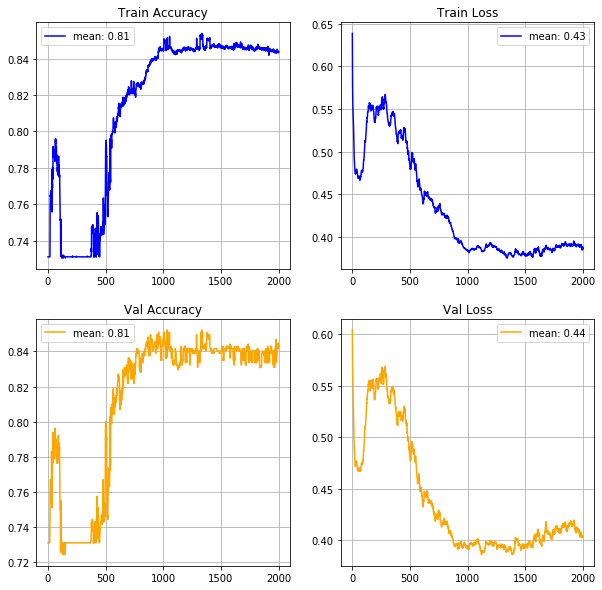

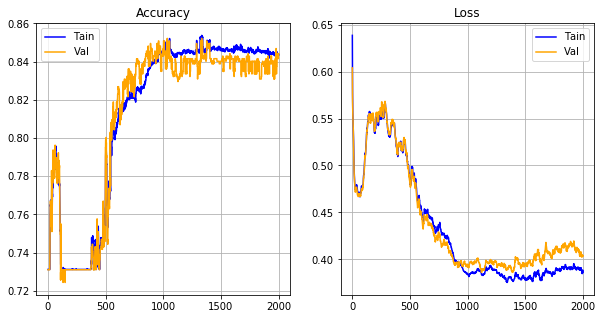

In [36]:
from matplotlib import pyplot as plt
history=[train_accuracy_history,train_loss_history,test_accuracy_history,test_loss_history]
titles = ['Train Accuracy', 'Train Loss', 'Val Accuracy', 'Val Loss']
plt.figure(figsize=(10, 10))
for i, image in enumerate(history):
    plt.subplot(2, 2, i+1)
    plt.title(titles[i])
    plt.grid()
    if i == 0 or i == 1:
        color = 'b'
    else:
        color = 'orange'
    plt.plot(image,c=color, label= 'mean: %.2f' % np.array(image).mean())
    plt.legend(loc='best')
plt.show()

# Рисуем совмещенные графики  Accuracy и Loss для Тренеровочной и валидационной выборки
titles_ = ['Accuracy','Loss']
plt.figure(figsize=(10, 5))
k=0
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.plot(history[0+k], label='Tain', c='b')
    plt.plot(history[2+k], label='Val', c='orange')
    plt.title(titles_[i])
    plt.grid()
    plt.legend(loc='best')
    k += 1


In [37]:
preds=model.forward(X_test)
m = torch.nn.Softmax(dim=1)
y_predicted=m(preds)
y_predicted=y_predicted.detach().numpy()
y_predicted

array([[0.91461067, 0.08538933],
       [0.8235269 , 0.1764731 ],
       [0.83563984, 0.16436016],
       ...,
       [0.82508108, 0.17491892],
       [0.90686223, 0.09313777],
       [0.93119925, 0.06880075]])

In [38]:
y_predicted[:,1].shape,y_test.shape

((751,), torch.Size([751]))

In [39]:
y_predicted[:,1]

array([0.08538933, 0.1764731 , 0.16436016, 0.15126663, 0.87405189,
       0.21156188, 0.15451868, 0.16436021, 0.07772995, 0.11848247,
       0.31499762, 0.06619108, 0.11763207, 0.77341057, 0.42919948,
       0.07348665, 0.15055133, 0.18743591, 0.93351097, 0.83134989,
       0.07514118, 0.8089386 , 0.11987673, 0.77341057, 0.19725891,
       0.08300894, 0.89875688, 0.77341057, 0.1010694 , 0.77341057,
       0.96451951, 0.28877167, 0.30836957, 0.77341057, 0.06684822,
       0.07376885, 0.8159179 , 0.16435999, 0.1682894 , 0.07522367,
       0.09004126, 0.77341057, 0.16432273, 0.1682894 , 0.07722947,
       0.07722947, 0.20184661, 0.07348665, 0.09830519, 0.08620554,
       0.11141033, 0.1010694 , 0.13242568, 0.09031685, 0.68395205,
       0.86967867, 0.84111807, 0.84273117, 0.80349553, 0.11725347,
       0.11945774, 0.2061647 , 0.08750702, 0.16436023, 0.09643219,
       0.16434736, 0.07348665, 0.0836722 , 0.77341057, 0.11359924,
       0.31499762, 0.84708507, 0.16435974, 0.08310821, 0.17647

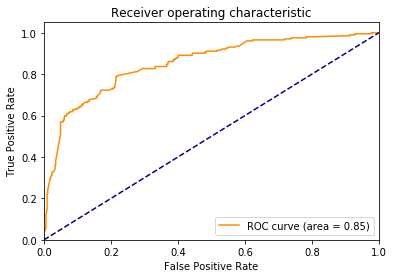

In [40]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [41]:
torch.save(model.state_dict(),'C:/Users/User/API/API_1m_v2')

In [ ]:
df1=pd.read_csv('C:/Users/User/API_task/bigData_V31.csv',sep=';',encoding='cp1252')

In [ ]:
df1.shape

In [ ]:
unique_id=df1.id.unique()
unique_id

In [ ]:
df1['enddate'] = pd.to_datetime(df1.enddate, format='%d.%m.%Y %H:%M')
df1['startdate']= pd.to_datetime(df1.startdate, format='%d.%m.%Y %H:%M')
df1['paid_time']= (pd.to_datetime(df1.paidDate, format='%d.%m.%Y %H:%M')-df1.startdate).dt.days

In [ ]:
df1=df1.loc[df1.startdate>'2019-06-01']

In [ ]:
client_data=df1.groupby('id',as_index=False).agg({'startdate':'max'}).rename({'startdate':'last_month'},axis=1)
df1['last_month']=df1.groupby(['id'])['startdate'].transform(max)

In [ ]:
end_of_time=max(df1.last_month)
end_of_time

In [ ]:
client_data['is_gone']=(client_data.last_month!=end_of_time)

In [ ]:
client_data.shape

In [ ]:
client_data.groupby('is_gone').count()

In [ ]:
excepted_columns=['paidDate','startdate','enddate','last_month']

In [ ]:
eps=1e-9
columns=list(set(list(df1))-set('id'))
for id in unique_id:
    print(id,end=' ')
    for col in columns:
        if col in excepted_columns:
            continue
        if df1.loc[df1.id==id].last_month.max()<end_of_time:
            max_value=df1.loc[(df1.id==id)&(df1.startdate>df1.last_month-pd.Timedelta(days=182))][col].astype(float).max()
            min_value=df1.loc[(df1.id==id)&(df1.startdate>df1.last_month-pd.Timedelta(days=182))][col].astype(float).min()
            cur_value=df1.loc[(df1.id==id)&(df1.last_month==df1.startdate)][col].astype(float).max()
        else:
            max_value=df1.loc[(df1.id==id)&(df1.startdate>df1.last_month-pd.Timedelta(days=182+45))&(df1.startdate<end_of_time)][col].astype(float).max()
            min_value=df1.loc[(df1.id==id)&(df1.startdate>df1.last_month-pd.Timedelta(days=182+45))&(df1.startdate<end_of_time)][col].astype(float).min()
            cur_value=df1.loc[(df1.id==id)&(df1.startdate>df1.last_month-pd.Timedelta(days=45))&(df1.startdate<end_of_time)][col].astype(float).max()
            

        client_data.loc[client_data.id==id,col+'max']=(cur_value+eps)/(max_value+eps)
        client_data.loc[client_data.id==id,col+'min']=(cur_value+eps)/(min_value+eps)
        client_data.loc[client_data.id==id,col+'cur']=cur_value

In [ ]:
client_data1=client_data.fillna(0)

In [ ]:
X=client_data1.drop(['is_gone','last_month','id'],axis=1)
y=client_data1.is_gone

In [ ]:
preds=model.forward(X)